# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

def vectorize_seq(seqs, dim = 10000):
    results = np.zeros((len(seqs), dim))
    for i , seq in enumerate(seqs):
        results[i, seq] = 1.
        
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2가지의 모델 설정

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model_1 = Sequential([Dense(16, activation = 'relu', input_shape = (10000, ), name = 'input'),
                     Dense(16, activation = 'relu', name = 'hidden'),
                     Dense(1, activation = 'sigmoid', name = 'output')])

In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_2 = Sequential([Dense(7, activation = 'relu', input_shape = (10000, ), name = 'input2'),
                     Dense(7, activation = 'relu', name = 'hidden2'),
                     Dense(1, activation = 'sigmoid', name = 'output2')])

In [6]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input2 (Dense)               (None, 7)                 70007     
_________________________________________________________________
hidden2 (Dense)              (None, 7)                 56        
_________________________________________________________________
output2 (Dense)              (None, 1)                 8         
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 컴파일
## 차이는 모델의 크기가 다르다! (Trainable params의 수가 다르다)
model_1.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc'])

model_2.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc'])

#### 2개의 모델 학습

In [8]:
model_1_hist = model_1.fit(x_train, y_train, epochs = 20, batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 41ms/step - loss: 0.4656 - acc: 0.8179 - val_loss: 0.3533 - val_acc: 0.8749
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2697 - acc: 0.9071 - val_loss: 0.3215 - val_acc: 0.8701
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2066 - acc: 0.9274 - val_loss: 0.2849 - val_acc: 0.8867
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1724 - acc: 0.9380 - val_loss: 0.3067 - val_acc: 0.8792
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1508 - acc: 0.9474 - val_loss: 0.3281 - val_acc: 0.8732
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1301 - acc: 0.9561 - val_loss: 0.3192 - val_acc: 0.8789
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1163 - acc: 0.9602 - val_loss: 0.3388 - val_acc: 0.8764
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1015 - a

In [9]:
model_2_hist = model_1.fit(x_train, y_train, epochs = 20, batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 36ms/step - loss: 0.0118 - acc: 0.9974 - val_loss: 0.8196 - val_acc: 0.8493
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0089 - acc: 0.9983 - val_loss: 0.8578 - val_acc: 0.8492
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0071 - acc: 0.9990 - val_loss: 0.8987 - val_acc: 0.8482
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0054 - acc: 0.9989 - val_loss: 0.9380 - val_acc: 0.8481
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.0058 - acc: 0.9985 - val_loss: 0.9771 - val_acc: 0.8469
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0062 - acc: 0.9984 - val_loss: 1.0193 - val_acc: 0.8469
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0016 - acc: 0.9999 - val_loss: 1.0851 - val_acc: 0.8453
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0025 - a

#### 비교

In [10]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

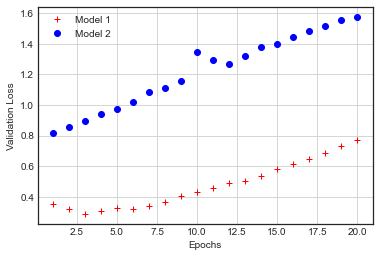

In [12]:
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label = 'Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 모델의 크기 축소 (2)

#### 모델 구성

In [13]:
model_3 = Sequential([Dense(1024, activation = 'relu', input_shape = (10000, ), name = 'input3'),
                     Dense(1024, activation = 'relu', name = 'hidden3'),
                     Dense(1, activation = 'sigmoid', name = 'output3')])

model_3.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input3 (Dense)               (None, 1024)              10241024  
_________________________________________________________________
hidden3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
output3 (Dense)              (None, 1)                 1025      
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [14]:
model_3_hist = model_3.fit(x_train, y_train, epochs = 20, batch_size = 512,
                           validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 40ms/step - loss: 0.5432 - acc: 0.7916 - val_loss: 0.3584 - val_acc: 0.8473
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2254 - acc: 0.9124 - val_loss: 0.4364 - val_acc: 0.8018
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1175 - acc: 0.9602 - val_loss: 0.3244 - val_acc: 0.8754
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0673 - acc: 0.9832 - val_loss: 0.4836 - val_acc: 0.8835
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1083 - acc: 0.9852 - val_loss: 0.4699 - val_acc: 0.8809
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0602 - acc: 0.9900 - val_loss: 0.4400 - val_acc: 0.8594
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6733 - val_acc: 0.8824
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 6.2551e-05

#### 시각화

In [15]:
model_3_val_loss = model_3_hist.history['val_loss']

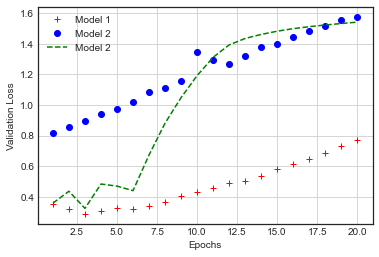

In [16]:
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label = 'Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label = 'Model 2')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

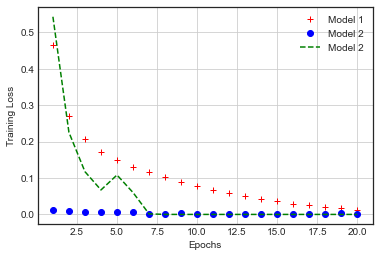

In [17]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']


plt.plot(epochs, model_1_train_loss, 'r+', label = 'Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label = 'Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label = 'Model 2')

plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [18]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential([Dense(30, kernel_initializer = 'he_normal', input_shape = [10, 10]),
                         LeakyReLU(alpha = 0.2),
                         Dense(1, kernel_initializer = 'he_normal'),
                         Activation('softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10, 30)            330       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10, 30)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             31        
_________________________________________________________________
activation (Activation)      (None, 10, 1)             0         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [21]:
optimizer = SGD(learning_rate = 0.001, momentum = 0.9)

## 관성계수(a) > momentum 값 : 운동/움직임같은 표현이 momentum값에 따라 작동

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [22]:
optimizer = SGD(learning_rate = 0.001, momentum = 0.9, nesterov = True)

## nesterov : 최솟값에 조금 더 빨리 다다를수 있도록 momentum에대해 확장개념 사용 가능

#### AdaGrad(Adaptive Gradient)

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [24]:
from tensorflow.keras.optimizers import Adagrad

In [25]:
optimizer = Adagrad(learning_rate = 0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [26]:
from tensorflow.keras.optimizers import RMSprop

In [28]:
optimizer = RMSprop(learning_rate = 0.001, rho = 0.9)

## rho >> RMSProp의 s값에 해당

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

- 일반적으로 가장 많이 사용

In [29]:
from tensorflow.keras.optimizers import Adam

In [30]:
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

### 배치 정규화(Batch Normalization)
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**(Activation Function)이전에 놓임

- >> Batch때마다 Normalization을 수행한다!! --> Generalization이 잘될수있도록 도와줌


In [34]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


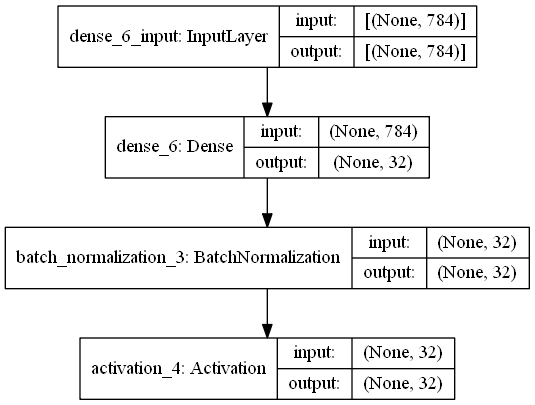

In [37]:
model = Sequential()

model.add(Dense(32, input_shape = (28*28, ), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes = True, to_file = 'BatchNormalization_model.png')

### 규제화(Regularization)
- 복잡한 네트워크 일수록 네트워크의 **복잡도**에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [38]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

#### 모델 구성

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


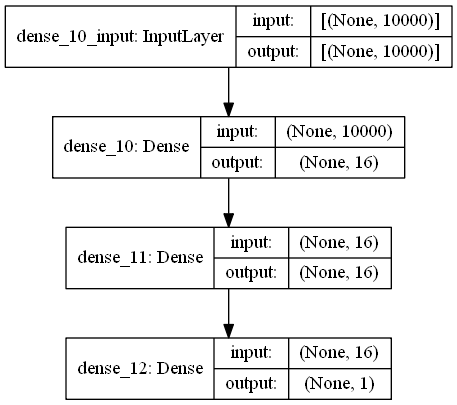

In [40]:
l2_model = Sequential([Dense(16, kernel_regularizer = l2(l2 = 0.001), activation = 'relu', input_shape = (10000, )),
                      Dense(16, kernel_regularizer = l2(l2 = 0.001), activation = 'relu'),
                      Dense(1, activation = 'sigmoid')])

l2_model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

l2_model.summary()
plot_model(l2_model, show_shapes = True, to_file = 'l2_model.png')

#### 모델 학습

In [41]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs = 20,
                            batch_size = 512, validation_data = (x_test, y_test))

## L2 >> overfitting되기전에 규제를 걸어줌으로서 방지

Epoch 1/20
49/49 [==============================] - 2s 39ms/step - loss: 0.5098 - acc: 0.8237 - val_loss: 0.3939 - val_acc: 0.8784
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3199 - acc: 0.9038 - val_loss: 0.3300 - val_acc: 0.8900
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2671 - acc: 0.9215 - val_loss: 0.3298 - val_acc: 0.8862
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2460 - acc: 0.9287 - val_loss: 0.3342 - val_acc: 0.8843
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2332 - acc: 0.9337 - val_loss: 0.3392 - val_acc: 0.8830
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2242 - acc: 0.9360 - val_loss: 0.3410 - val_acc: 0.8824
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2172 - acc: 0.9399 - val_loss: 0.3493 - val_acc: 0.8802
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2137 - a

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

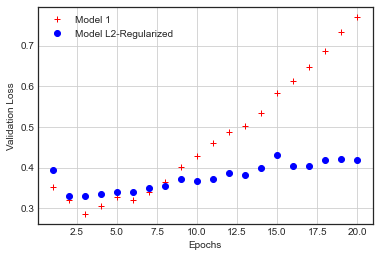

In [42]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label = 'Model L2-Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

## L2 규제를 통해 가중치(weight)를 감소(=규제)해준다는 것을 알수있음

#### L1과 비교

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


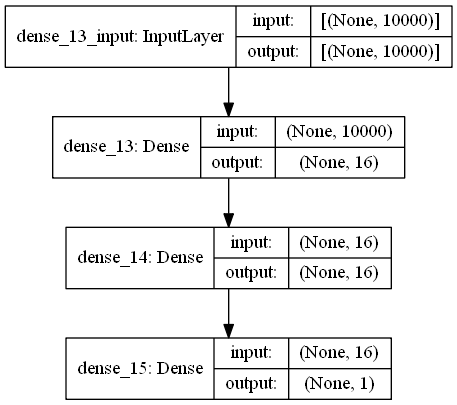

In [43]:
l1_model = Sequential([Dense(16, kernel_regularizer = l1(l1 = 0.0001), activation = 'relu', input_shape = (10000, )),
                      Dense(16, kernel_regularizer = l1(l1 = 0.0001), activation = 'relu'),
                      Dense(1, activation = 'sigmoid')])

l1_model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

l1_model.summary()
plot_model(l1_model, show_shapes = True, to_file = 'l1_model.png')

In [44]:
l1_model_hist = l1_model.fit(x_train, y_train, epochs = 20,
                            batch_size = 512, validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 40ms/step - loss: 0.5669 - acc: 0.8104 - val_loss: 0.4443 - val_acc: 0.8584
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3732 - acc: 0.8947 - val_loss: 0.3711 - val_acc: 0.8870
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3322 - acc: 0.9043 - val_loss: 0.3628 - val_acc: 0.8874
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3144 - acc: 0.9120 - val_loss: 0.3641 - val_acc: 0.8859
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3017 - acc: 0.9161 - val_loss: 0.3881 - val_acc: 0.8764
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2928 - acc: 0.9209 - val_loss: 0.3871 - val_acc: 0.8775
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2912 - acc: 0.9196 - val_loss: 0.3723 - val_acc: 0.8818
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2809 - a

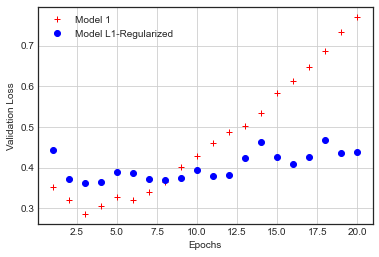

In [45]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label = 'Model L1-Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

3가지 모델 비교
- Original
- L1
- L2

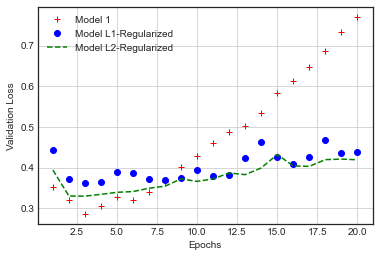

In [48]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label = 'Model L1-Regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label = 'Model L2-Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1, L2와 비교

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


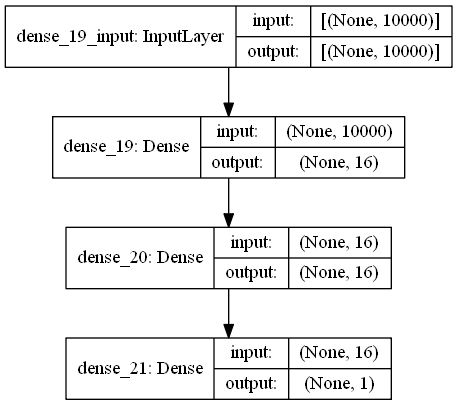

In [47]:
## L1, L2 둘다 사용하는 모델링

l1_l2_model = Sequential([Dense(16, kernel_regularizer = l1_l2(l1=0.0001, l2=0.0001), 
                                activation = 'relu', input_shape = (10000, )),
                      Dense(16, kernel_regularizer = l1_l2(l1=0.0001, l2=0.0001), 
                            activation = 'relu'),
                      Dense(1, activation = 'sigmoid')])

l1_l2_model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes = True, to_file = 'l1_l2_model.png')

In [50]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train, epochs = 20,
                            batch_size = 512, validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 39ms/step - loss: 0.5507 - acc: 0.8198 - val_loss: 0.4144 - val_acc: 0.8834
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3652 - acc: 0.8966 - val_loss: 0.3673 - val_acc: 0.8892
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3243 - acc: 0.9084 - val_loss: 0.3579 - val_acc: 0.8877
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3121 - acc: 0.9127 - val_loss: 0.3607 - val_acc: 0.8872
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3024 - acc: 0.9149 - val_loss: 0.3772 - val_acc: 0.8777
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2917 - acc: 0.9225 - val_loss: 0.3746 - val_acc: 0.8803
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2878 - acc: 0.9221 - val_loss: 0.4053 - val_acc: 0.8686
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2796 - a

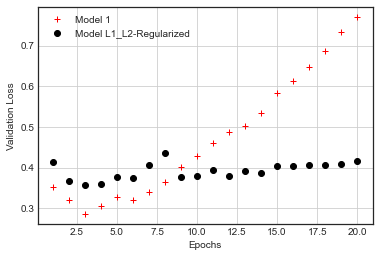

In [51]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label = 'Model L1_L2-Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

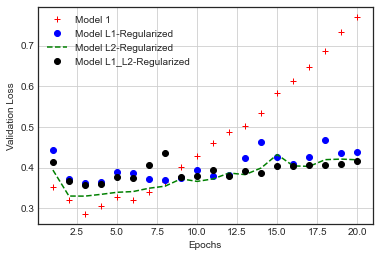

In [52]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label = 'Model L1-Regularized')
plt.plot(epochs, l2_model_val_loss, 'g--', label = 'Model L2-Regularized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko', label = 'Model L1_L2-Regularized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

## 데이터셋에 따라 결과가 달라질수있기에, 모두 적용해보는게 가장 바람직함

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨 >> 약 20% ~ 50%를 훈련에서 제외시켜버림

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [53]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


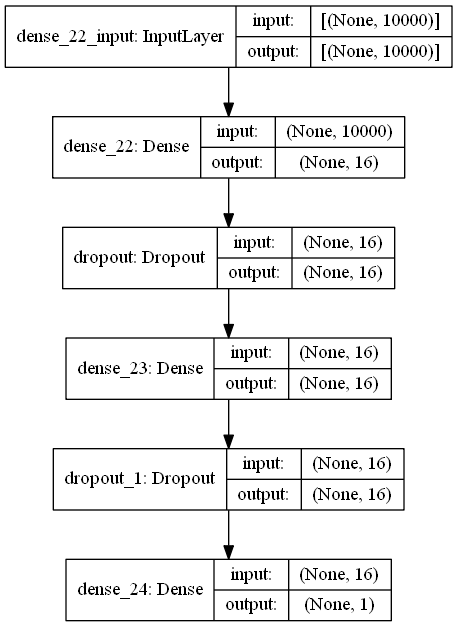

In [55]:
dropout_model = Sequential([Dense(16, activation = 'relu', input_shape = (10000, )),
                            Dropout(0.5),
                            Dense(16, activation = 'relu'),
                            Dropout(0.5),
                            Dense(1, activation = 'sigmoid')])

dropout_model.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['acc'])

dropout_model.summary()
plot_model(dropout_model, show_shapes = True, to_file = 'dropout_model.png')

#### 모델 학습

In [56]:
dropout_model_hist = dropout_model.fit(x_train, y_train, epochs = 20,
                            batch_size = 512, validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 40ms/step - loss: 0.6368 - acc: 0.6584 - val_loss: 0.5624 - val_acc: 0.8055
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.5282 - acc: 0.8241 - val_loss: 0.4806 - val_acc: 0.8459
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4597 - acc: 0.8758 - val_loss: 0.4408 - val_acc: 0.8714
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.4083 - acc: 0.9026 - val_loss: 0.4208 - val_acc: 0.8751
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3694 - acc: 0.9134 - val_loss: 0.4103 - val_acc: 0.8756
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3325 - acc: 0.9210 - val_loss: 0.3994 - val_acc: 0.8736
Epoch 7/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3047 - acc: 0.9244 - val_loss: 0.4045 - val_acc: 0.8720
Epoch 8/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2763 - a

#### 시각화

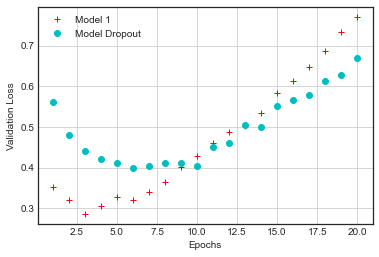

In [57]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label = 'Model 1')
plt.plot(epochs, dropout_model_val_loss, 'co', label = 'Model Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()